[*********************100%***********************]  1 of 1 completed


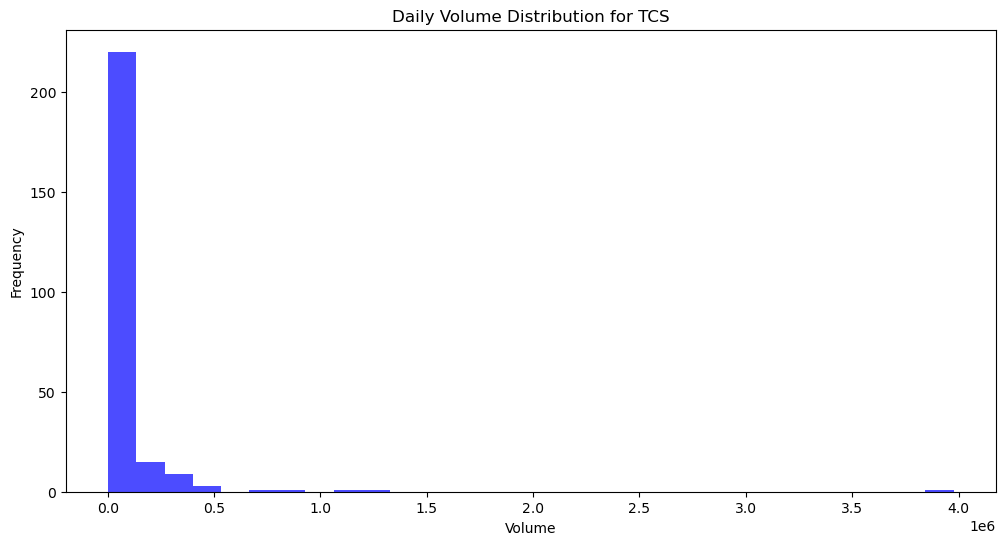

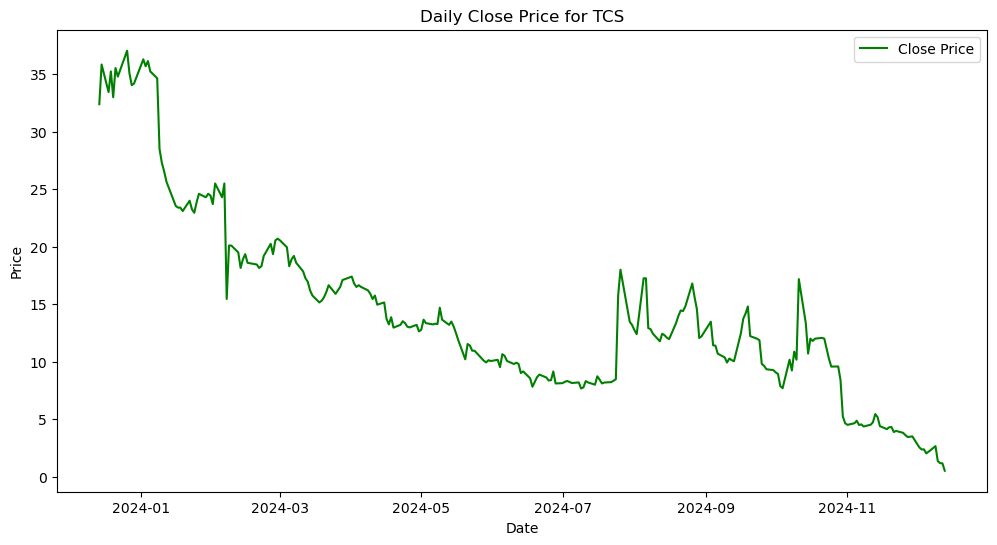

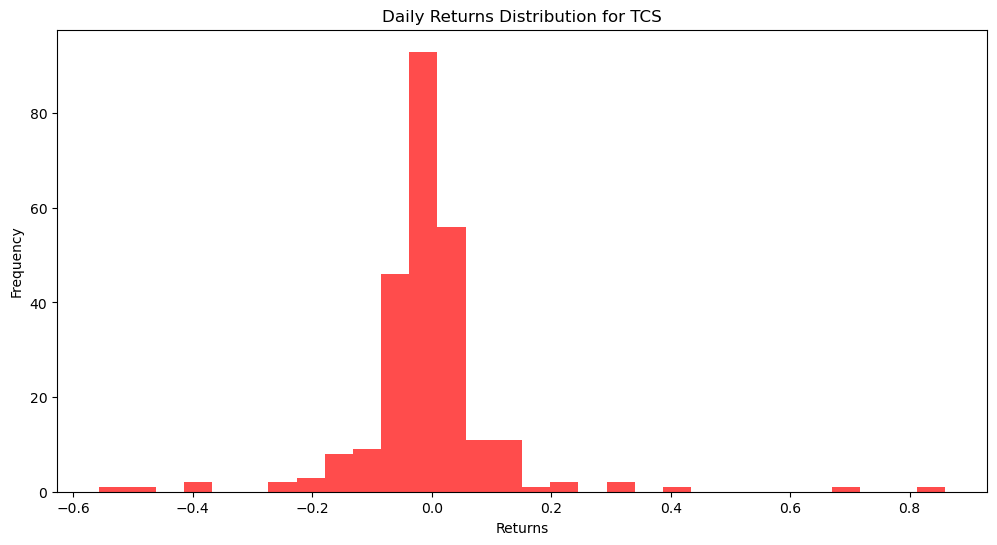

Stock: TCS
T-score: 1.6509714898126586
Z-score: 5.307839161554533e-18


In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import t, zscore

# Function to get and plot data for a stock
def analyze_stock(stock):
    # Fetch historical data from Yahoo Finance
    data = yf.download(stock, period='1y')
    
    # Daily returns
    data['Returns'] = data['Adj Close'].pct_change()
    
    # Plot Daily Volume
    plt.figure(figsize=(12, 6))
    plt.hist(data['Volume'], bins=30, alpha=0.7, color='blue')
    plt.title(f'Daily Volume Distribution for {stock}')
    plt.xlabel('Volume')
    plt.ylabel('Frequency')
    plt.show()
    
    # Plot Daily Close Price
    plt.figure(figsize=(12, 6))
    plt.plot(data['Adj Close'], label='Close Price', color='green')
    plt.title(f'Daily Close Price for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    # Plot Daily Returns
    plt.figure(figsize=(12, 6))
    plt.hist(data['Returns'].dropna(), bins=30, alpha=0.7, color='red')
    plt.title(f'Daily Returns Distribution for {stock}')
    plt.xlabel('Returns')
    plt.ylabel('Frequency')
    plt.show()
    
    # T-score and Z-score calculations
    t_stat = t.ppf(0.95, len(data['Returns'].dropna()) - 1)
    z_score = zscore(data['Returns'].dropna())
    
    print(f"Stock: {stock}")
    print(f"T-score: {t_stat}")
    print(f"Z-score: {z_score.mean()}")

# Analyze a specific stock (e.g., TCS)
analyze_stock('TCS')
